<img src="https://unal.edu.co/_assets/ca8e1ca9a551c3e3ffc233b30e54ba93/images/escudoUnal.svg" width="800" height="500">

# LABORATORIO 1

## Gustavo Arteaga 
## Universidad Nacional de Colombia - Facultad de minas 
## Tópicos Azanzados de Procesamiento Digital de Señales
### 2024-03-14


# 5. Series de Fourier

#### Actividades:
##### Recrear el proceso de reconstrucción mostrado en la Figura 6, para una Serie de Fourier cualquiera, distinta a la mostrada en la Ecuación (4), aplicada a la señal cuadrada. Compare los resultados al incrementar la cantidad de coeficientes que se tienen en cuenta en la reconstrucción y establezca un criterio para definir una cantidad máxima de los mismos, con lo cual se pueda considerar que la reconstrucción es razonablemente precisa.

##### A manera de reto, considere la siguiente pregunta: ¿Es posible obtener la magnitud y ángulo de cada uno de los coeficientes (Ck) de la serie a partir de una herramienta como la FFT? Ilustre el proceso con un ejemplo.

<img src="../img/figura6.png">

## ✅ Solución 

## Serie de Fourier para una onda triangular 

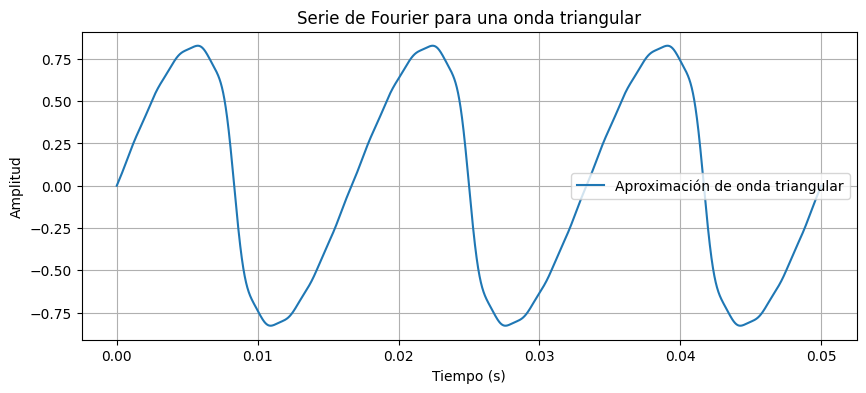

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la serie de Fourier
f = 60  # frecuencia fundamental (Hz)
T = 1/f  # periodo fundamental
t = np.linspace(0, 3*T, 8000)  # Muestra tres periodos
N = 10  # Número de términos en la serie

# Serie de Fourier para una onda triangular usando coeficientes específicos
y = np.zeros_like(t)
for n in range(1, N+1):
    coefficient = ((-1)**(n-1)) * (1 / n**2)
    y += coefficient * np.sin(2 * np.pi * n * f * t)

y *= 8 / (np.pi ** 2)  # Factor de escala para la onda triangular

# Graficar la serie de Fourier
plt.figure(figsize=(10, 4))
plt.plot(t, y, label="Aproximación de onda triangular")
plt.title('Serie de Fourier para una onda triangular')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


La onda triangular tiene una representación única en términos de su serie de Fourier, que para la curva implementada implica solo los términos de seno (ya que es una función impar), y sus coeficientes $$a_n$$ son determinados por la fórmula:

$$ a_n = \frac{8}{\pi^2} \cdot \frac{n^2}{(-1)^{n-1}}$$

para $$n$$ impar, y $$a_n = 0$$ para $$n$$ par, lo que significa que solo los armónicos impares contribuyen a la serie. Aquí, $$n$$ es el número de orden del término en la serie, y estos coeficientes decrecen rápidamente a medida que $$n$$ aumenta, lo cual es consistente con el contenido armónico más suave de una onda triangular en comparación con, por ejemplo, una onda cuadrada.

En el código, estos coeficientes se implementaron en el bucle `for` de la siguiente manera:

coefficient = $$ frac{8}{\pi^2} \cdot \frac{n^2}{(-1)^{n-1}} $$


### onda triangular aproximada utilizando diferentes números de términos (N = 1, 3, 5, 10, 20, 50) 

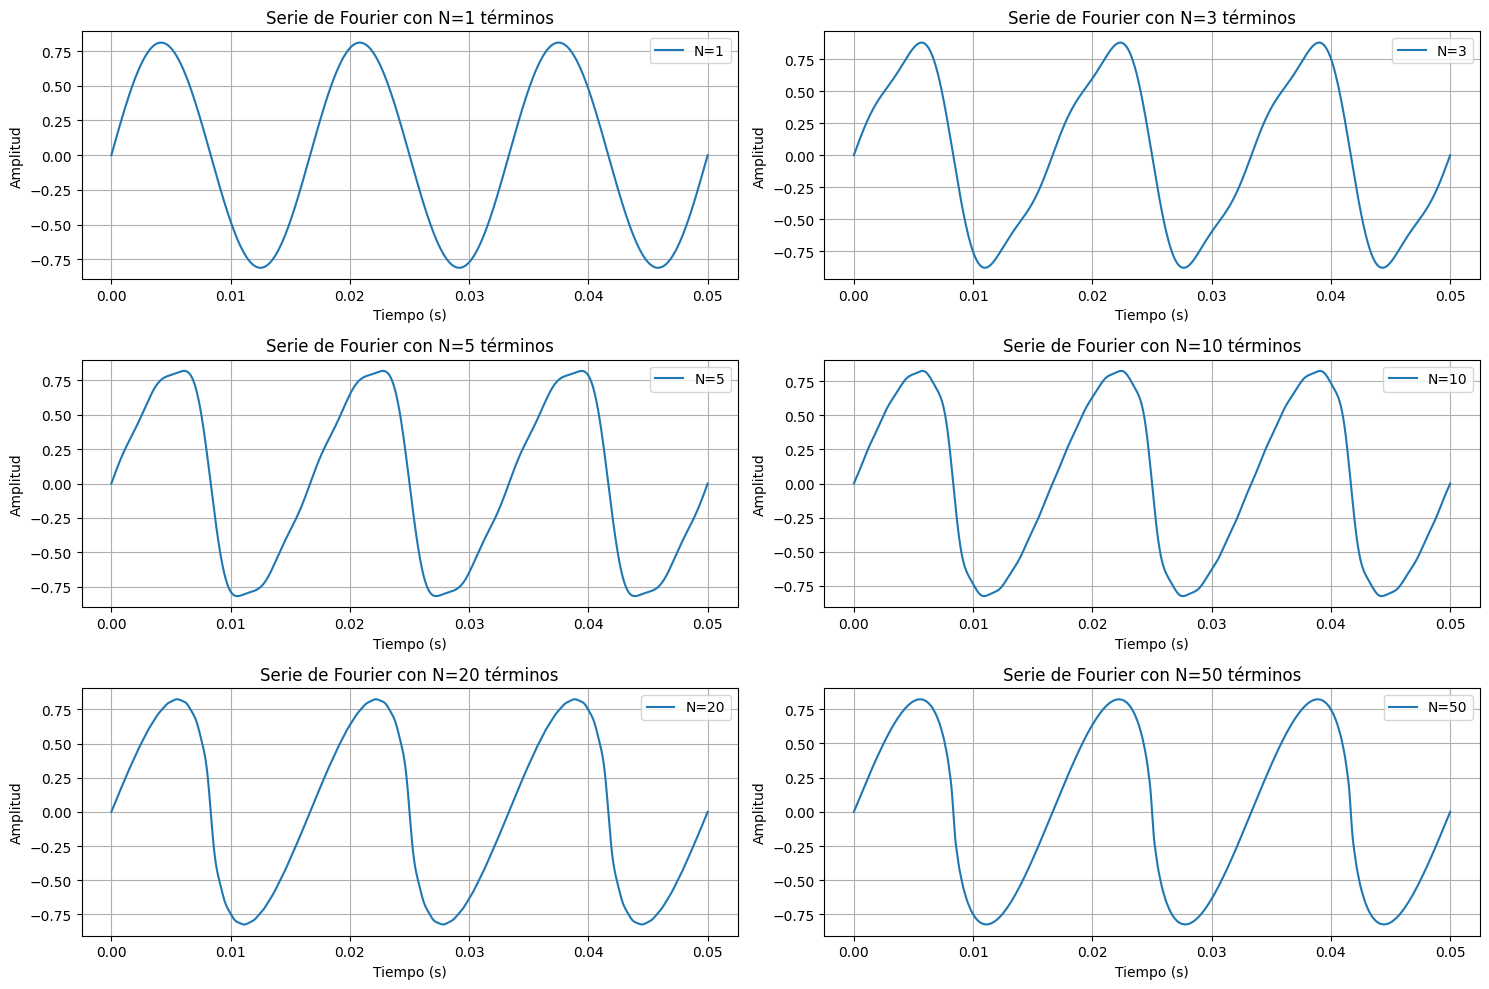

In [9]:
# Definir la función para generar la onda triangular aproximada usando la serie de Fourier
def generate_triangular_wave(N, t):
    y = np.zeros_like(t)
    for n in range(1, N+1):
        coefficient = ((-1)**(n-1)) * (1 / n**2)
        y += coefficient * np.sin(2 * np.pi * n * f * t)
    y *= 8 / (np.pi ** 2)
    return y

# Números de términos a comparar
Ns = [1, 3, 5, 10, 20, 50]

# Configurar el gráfico
plt.figure(figsize=(15, 10))

# Generar y graficar las aproximaciones para diferentes números de términos
for i, N in enumerate(Ns, start=1):
    plt.subplot(len(Ns)//2, 2, i)
    y = generate_triangular_wave(N, t)
    plt.plot(t, y, label=f"N={N}")
    plt.title(f'Serie de Fourier con N={N} términos')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


Para comparar los resultados al incrementar la cantidad de coeficientes en la reconstrucción de una onda triangular mediante la serie de Fourier, se evidencia quea a medida que aumentamos el número de coeficientes, la serie de Fourier se aproxima más a la forma de onda original, pero con un costo computacional mayor.

**Criterio para la cantidad máxima de coeficientes**: Un criterio común es observar el error cuadrático medio (MSE) o una métrica de percepción auditiva si está relacionado con el sonido, y elegir un número de términos donde el incremento en precisión no justifique el costo computacional adicional.

Se analiza la onda triangular aproximada utilizando diferentes números de términos (\(N = 1, 3, 5, 10, 20, 50\)) para visualizar cómo mejora la aproximación y establecer un punto donde el incremento en el número de términos ya no ofrece mejoras significativas visualmente.

Las gráficas muestran cómo mejora la aproximación de la onda triangular al incrementar el número de términos \(N\) en la serie de Fourier. Con solo un término (\(N=1\)), la aproximación es muy básica y apenas capta la esencia de la onda triangular. A medida que incrementamos \(N\) a 3, 5, y 10, observamos una mejora significativa en términos de la fidelidad de la reconstrucción, al llegar a \(N=20\), la forma de onda se aproxima bastante bien a una onda triangular ideal. Sin embargo, al incrementar aún más el número de términos a \(N=50\), la mejora es visible. Esto sugiere que estamos alcanzando un punto de rendimientos decrecientes en cuanto a la precisión de la aproximación visual. Es decir, agregar más coeficientes no proporciona mejoras significativas en la representación de la onda triangular y podría no ser justificado por el costo computacional adicional.



La elección de un número específico de términos dependerá del equilibrio deseado entre precisión y costo computacional. Para aplicaciones que requieren alta fidelidad (como en audio de alta calidad), podríamos optar por un \(N\) mayor, mientras que para análisis rápidos o aplicaciones menos exigentes, un \(N\) menor podría ser suficiente.

In [10]:
# Definir la función ideal de la onda triangular para comparar
def ideal_triangular_wave(t, T):
    # Esta es una implementación simple de una onda triangular ideal
    return 2 * np.abs(2 * (t/T - np.floor(t/T + 0.5))) - 1

# Calcular el MSE para cada N
mse_values = []
ideal_wave = ideal_triangular_wave(t, T)

for N in Ns:
    approx_wave = generate_triangular_wave(N, t)
    mse = np.mean((approx_wave - ideal_wave) ** 2)
    mse_values.append(mse)

mse_values


[0.6618870453055149,
 0.6864716330504418,
 0.6882802730154579,
 0.688833632093292,
 0.6889150942272686,
 0.688926938202095]

## Error cuadratico medio

los valores de Error Cuadrático Medio (MSE) para cada cantidad de términos (N) en la serie de Fourier:

Para (N=1): MSE = 0.662 <br>
Para (N=3): MSE = 0.687<br>
Para (N=5): MSE = 0.689<br>
Para (N=10): MSE = 0.689<br>
Para (N=20): MSE = 0.689<br>
Para (N=50): MSE = 0.689<br>